## An introduction to Matplotlib

In [4]:
%matplotlib notebook  
#enables interactive plotting in jupyter notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


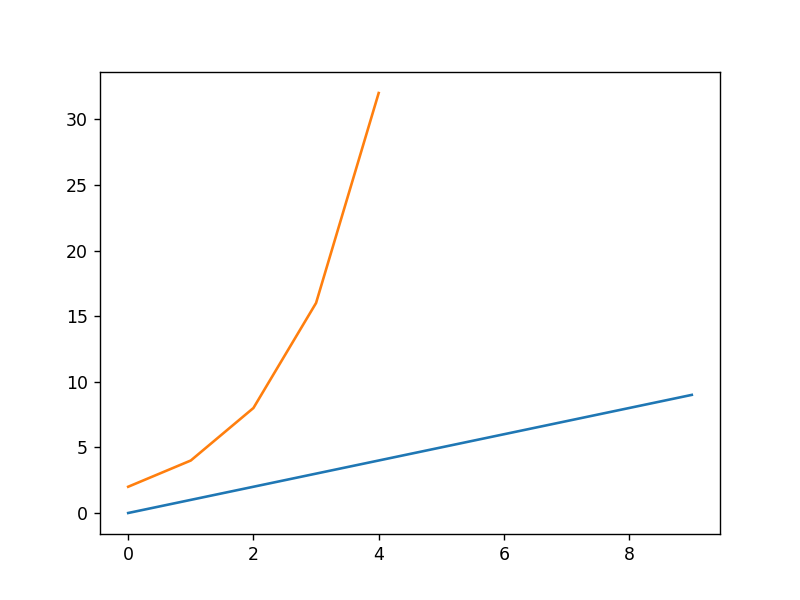

In [6]:
plt.plot(data)

In [7]:
data = [2, 4, 8, 16, 32]
plt.plot(data)

### Figures and Subplots

<IPython.core.display.Javascript object>


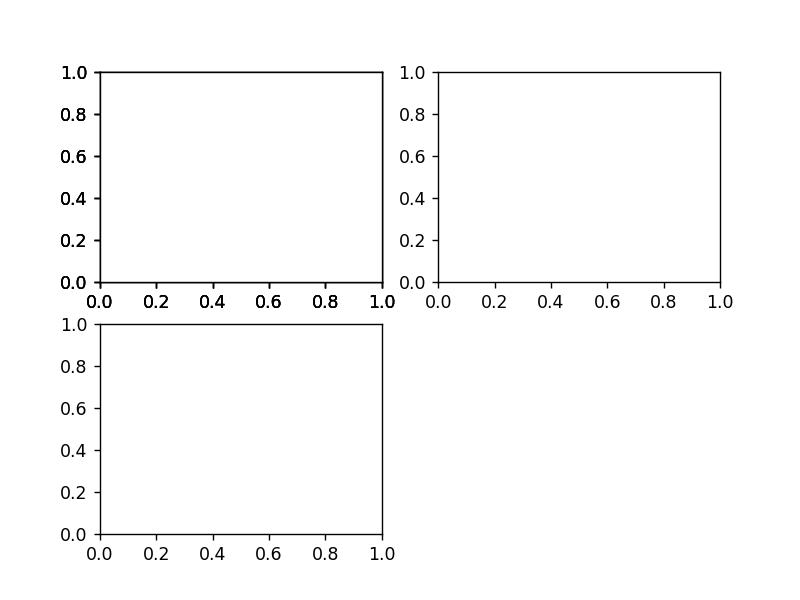

In [8]:
# the plots in matplotlib are stored inside the Figure object
# we can think of the figure as basically a canvas for our plots
fig = plt.figure() # new figures can be created usign this

In [11]:
# now we are adding subplots within the figure
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# the above creates a 2 x 2 figure (so 4 plots in total)
# the third parameter indicates the position of the subplot

<IPython.core.display.Javascript object>


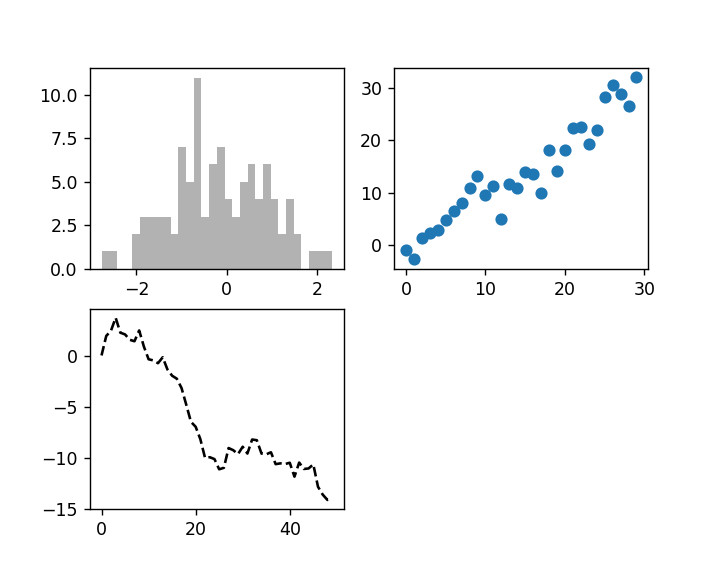

In [16]:
# now we run all the commands in the same cell
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [17]:
plt.plot(np.random.randn(50).cumsum(), 'k--') # k-- is styling for black dotted line
# as we can see, matplotlib will draw on the last figure and subplot used

In [19]:
# the object returned by the add_subplot() is the AxesSubplot
# this is an object from the main object Axes which is basically a multi-purpose tool that offers all the elemets required for plotting
# this includes things like plot, scatter, hist, etc
_ = ax1.hist(np.random.randn(100), bins=30, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# so we can also use the AxesSubplot object as a reference for another plot

<IPython.core.display.Javascript object>


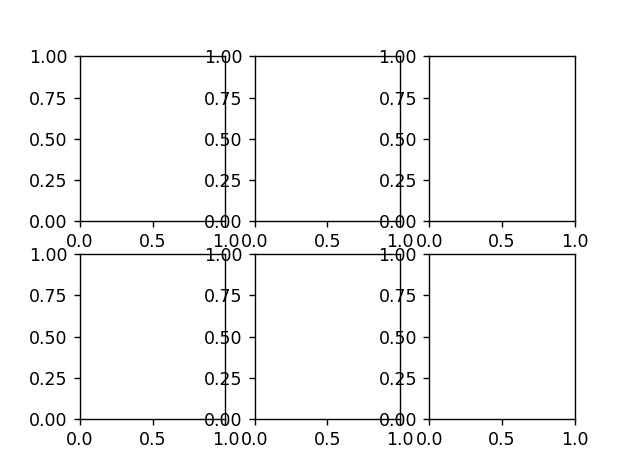

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [20]:
fig, axes = plt.subplots(2, 3)
axes # axes is the array containing ecvery subplot object
# fig is the figure within which the subplots are present

### Adjusting the space around subplots

<IPython.core.display.Javascript object>


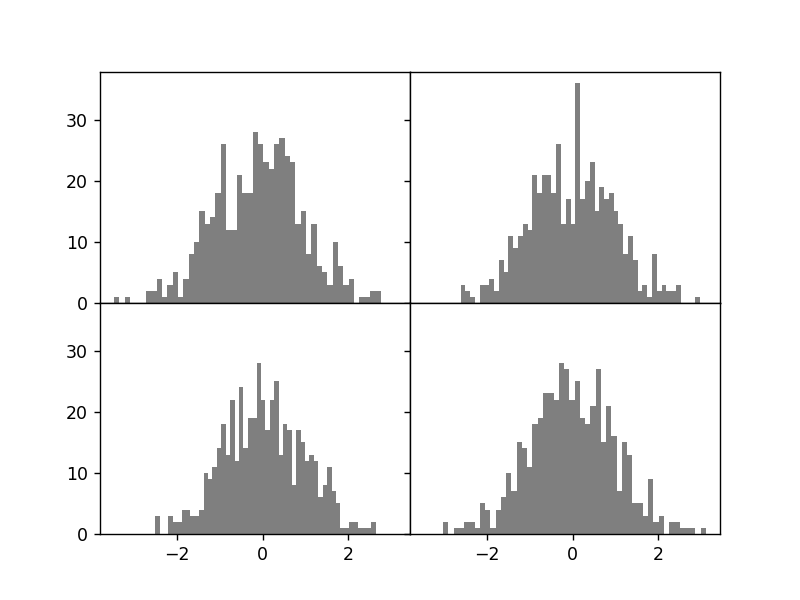

In [26]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) # share- they follow a standard x/y scale for all the plots
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)
# subplots_adjust is used to alter the spacing/padding around each induvidual plot

### Colors, Markeres and Line Styles

<IPython.core.display.Javascript object>


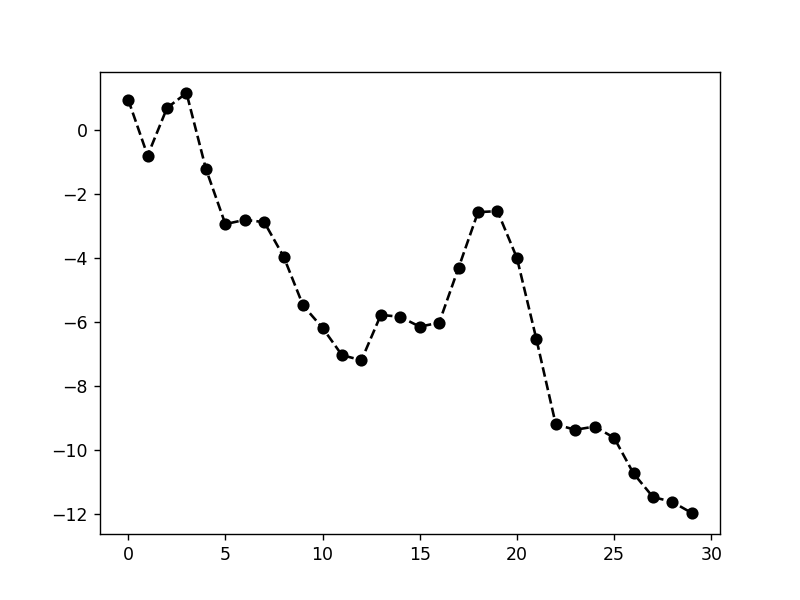

In [32]:
# markers are used to highlight the data points
fig = plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ko--')
# same as the one below
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
# but as we can see the one above is very long, hence we choose to use string literals like 'k--' instead.

<IPython.core.display.Javascript object>


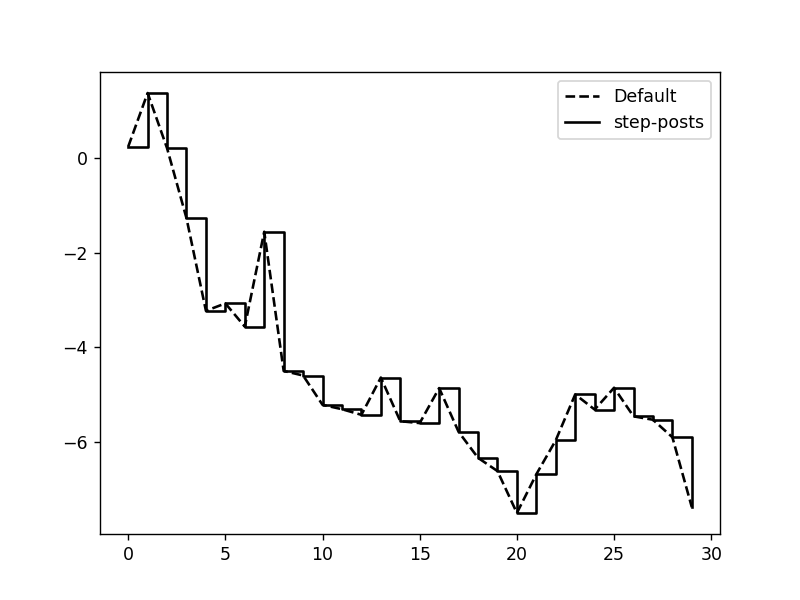

In [37]:
fig = plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

In [38]:
# drawstlye - used to change the relationship between the points
plt.plot(data, 'k-', drawstyle='steps-post', label='step-posts')
plt.legend(loc='best')

### Ticks, Labels and Legends

For most of the plotting, there are two main ways to do things: using the procedural pyplot interface or the more object-oriented native matplotlib API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

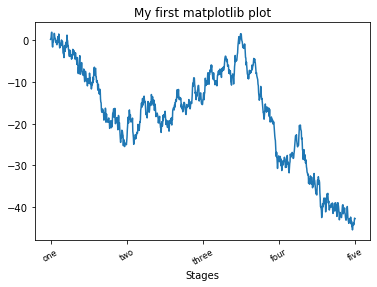

In [25]:
# set_xticks can be used to set the tick/marker locations on the axes
# set_xticks_labels used to set labels for each of the ticks
# set_xlabel is used to set a label for the entire x-axis
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(np.random.randn(1000).cumsum())

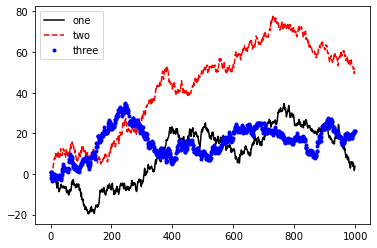

In [29]:
# we can also add legends using legend()
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'r--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'b.', label='three')
ax.legend(loc='best') # loc tells us where to place the legend on the plot

### Annotations on a Subplot
We may wish to draw our own plot annotations consisting of text, arrows and annontate functions

Text(50, 2, 'Hello World!')

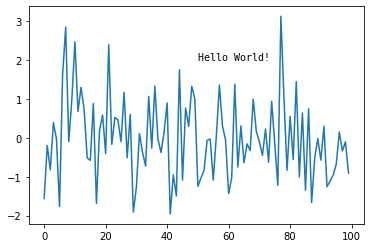

In [33]:
# text - draws text at given coordiantes (x, y)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(100))
ax.text(50, 2, 'Hello World!', family='monospace', fontsize=10)

In [41]:
# annotate - can draw both text and arrows at the given (x, y) coordinate
from datetime import datetime
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

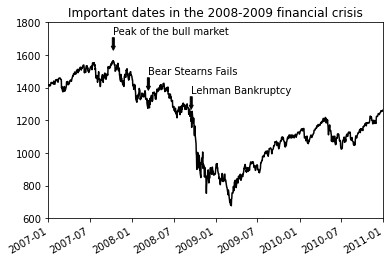

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
spx = data['SPX']
spx.plot(ax=ax, style='k-') # we are plotting the data frame data

crisis_data = [ # cotains data about the points to be annotated
    (datetime(2007, 10, 11), 'Peak of the bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
# we are selecting within the date range
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

### Drawing on a subplot
Adding shapes to our subplot

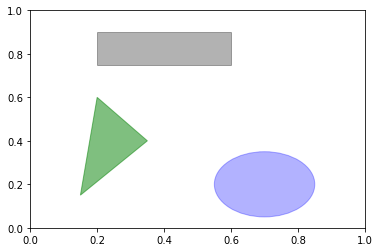

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to a File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

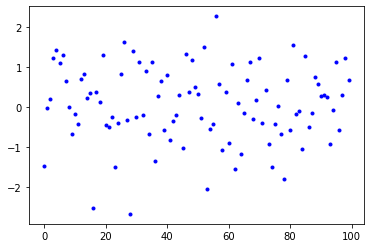

In [6]:
# plt.savefig() - save an active figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(100), 'b.')
plt.savefig('examples/fig_save.png', dpi=400, bbox_inches='tight')
# we can also save it in a differnt format(svg, png, pdf, etc)

In [5]:
# we can also write it to any file like object such as BytesIO
# BytesIO - can be useful when you need to pass data to or from an API that expect to be given a file object, but where you'd prefer to pass the data directly.

<Figure size 432x288 with 0 Axes>

### matplotlib Configuration
matplotlib is configured wih many default color schemes and defaults. However, nearly all of these can be customized by an extensive set of global parameters

Text(0.5, 1.0, 'Modified figure')

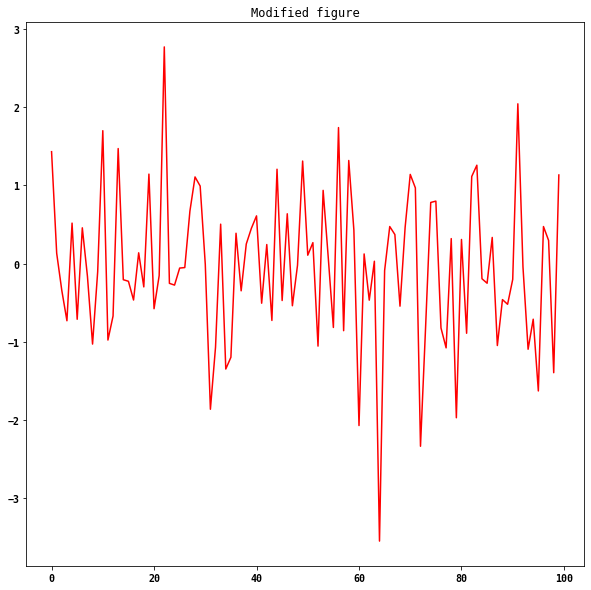

In [11]:
# we can modify configurations using the rc method
plt.rc('figure', figsize=(10, 10))
font_options = {'family' : 'monospace', 'weight' : 'bold'}
plt.rc('font', **font_options)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(100), 'r')
ax.set_title("Modified figure")

In [12]:
plt.rcdefaults() # restores the configurations back to original ones

## Plotting with pandas and seaborn

pandas - it has its own built-in methods for visualizations for Dataframe and Series objects. pandas has a plot attribute for making some basic plot types

seaborn - it is a statistical graphics library that simplifies creating many common visualisations. It does so by modifying matplotlib's default configurations to imporve readability and aesthetics

### Line Plots

<AxesSubplot:>

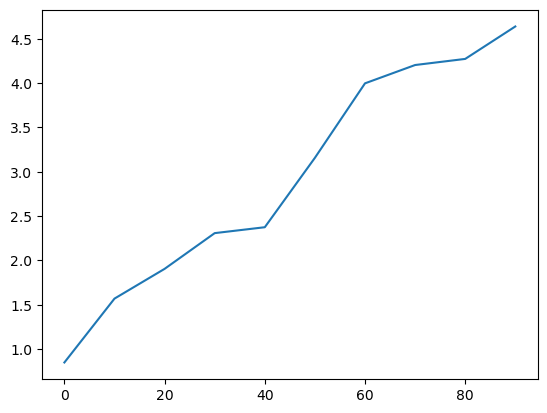

In [15]:
s = pd.Series(np.random.rand(10).cumsum(), index=np.arange(0, 100, 10))
# by default it uses the index for plotting x-axis
# we can disable by passing use_index = False
# we can decribe our own uing tick and lim functions
s.plot()

<AxesSubplot:>

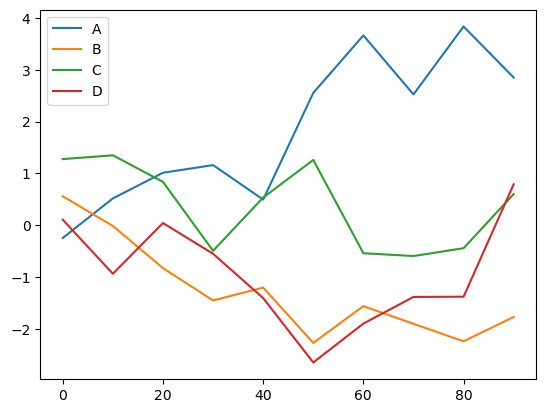

In [19]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'],
                  index = np.arange(0, 100, 10))
df.plot()

Dataframe has a number of options allowing flexability with how the columns are handled. Eg: we can plot each column in different subplots using 'subplots'

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

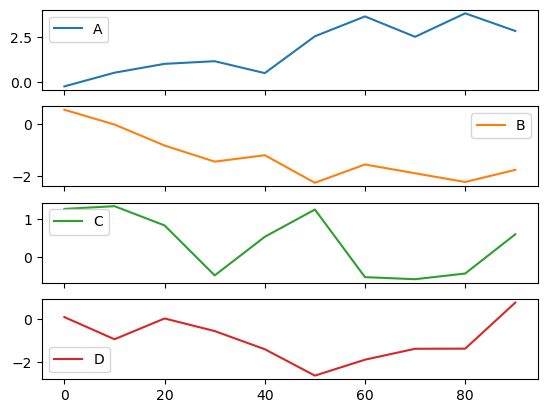

In [20]:
df.plot(subplots=True)

### Bar plots

plot.bar() - used to plot vertical plots<br>
plot.barh() - used to plot horizontal plots<br>
The index is taken as the x-axis

<AxesSubplot:>

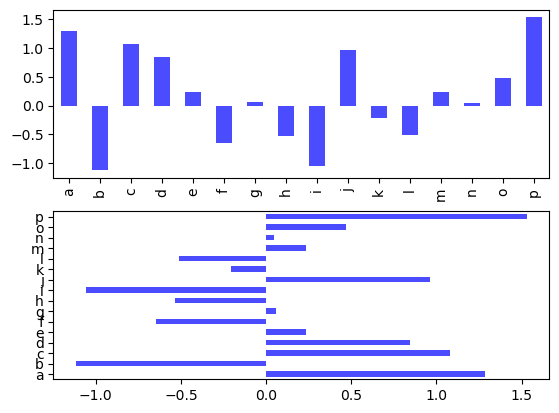

In [22]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='b', alpha=0.7)
data.plot.barh(ax=axes[1], color='b', alpha=0.7)

In a dataframe, the bar plots group the values of the columns of each row together in a group in bars, side by side.

In [31]:
df = pd.DataFrame(np.abs(np.random.randn(6, 4)),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
one,0.317631,1.076542,0.153646,0.263342
two,1.378396,1.027852,0.585830,0.289860
three,0.095426,1.627567,0.312529,0.754708
four,0.834072,1.094383,2.071506,0.381128
five,0.208537,0.009309,0.413078,1.732574
six,0.166587,0.781416,0.607080,1.994343


<AxesSubplot:>

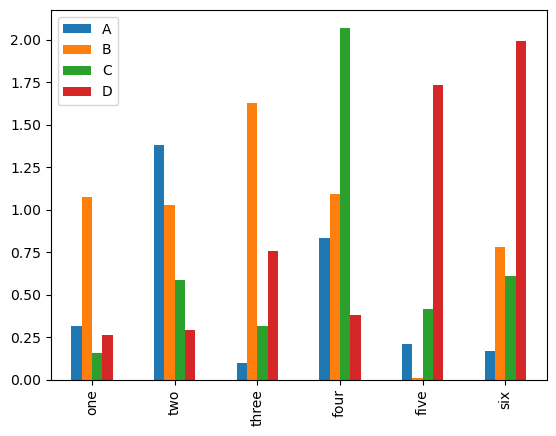

In [32]:
df.plot.bar()

Instead of the grouothe ping of the column values per row, we can stack them on top of each using stacked=True

<AxesSubplot:>

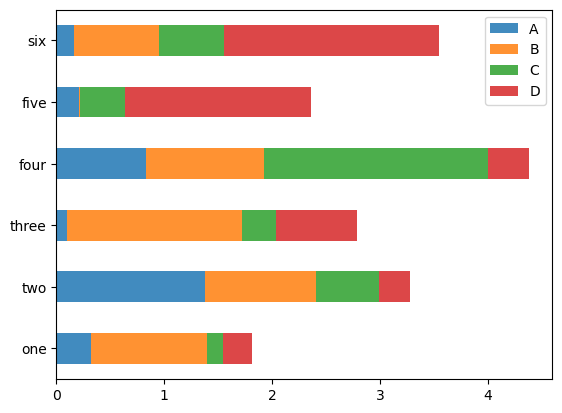

In [36]:
df.plot.barh(stacked=True, alpha=0.85)

In [37]:
tips = pd.read_csv('examples/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [38]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [39]:
party_counts = party_counts.loc[:, 2:5] # we are excluding 1 and 6 size parties
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [40]:
# normalising the sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

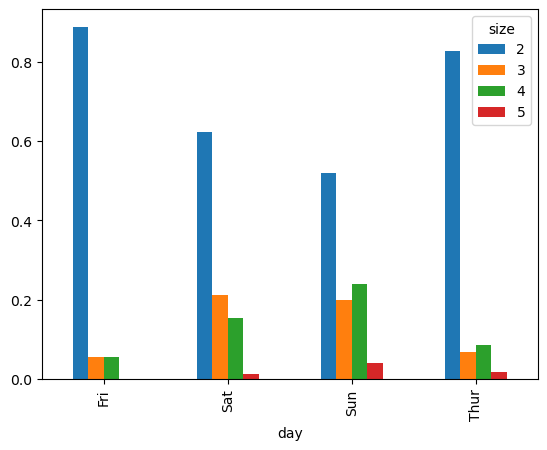

In [41]:
party_pcts.plot.bar()

From the above we can see that the size of the parties increases in the weekends<br>
Now we try to compute the tipping percentage by day with seaborn

In [42]:
import seaborn as sns

In [43]:
tips['tips_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tips_pct', ylabel='day'>

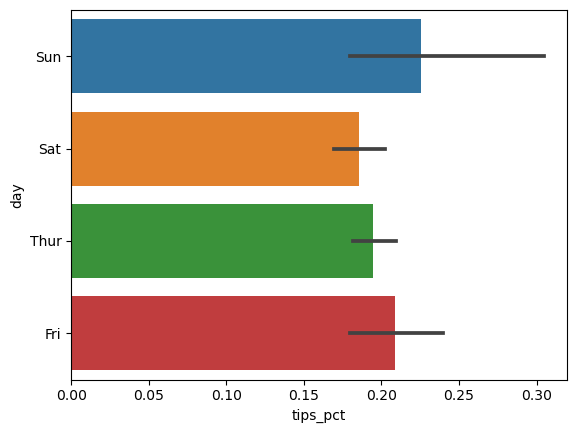

In [45]:
sns.barplot(x='tips_pct', y='day', data=tips, orient='h')

The balck lines indicate the 95% confidence interval

The hue option enables us to split by an additional categorical value <br>
We can switch between different plot appearances using sns.set()

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

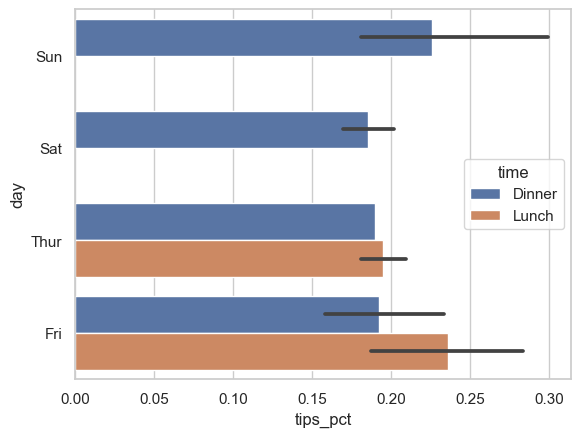

In [55]:
sns.set(style='whitegrid')
sns.barplot(x='tips_pct', y='day', hue='time', data=tips, orient='h')
#sns.set(style='white') # deafault

### Histograms and Density plots

A histogram is kind of a bar plot the gives a display of the value frequency.
It splits the data points into evenly spaced bins and then the number of data points in each bin is plotted.<br>
plot.hist() is a method on a pandas object

<AxesSubplot:ylabel='Frequency'>

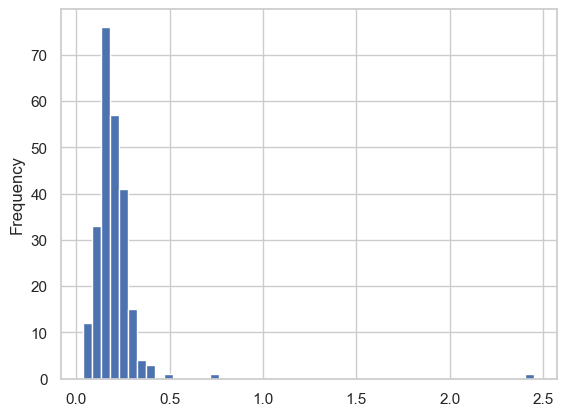

In [56]:
tips['tips_pct'].plot.hist(bins=50)

A related plot is a density plot which is formed by estimating the continuous probability distribution that might have generated the observed data. Done using kernals, hence it is also called as kernal density estimate.<br>
Similar call nature to histogram - plot.density()

<AxesSubplot:ylabel='Density'>

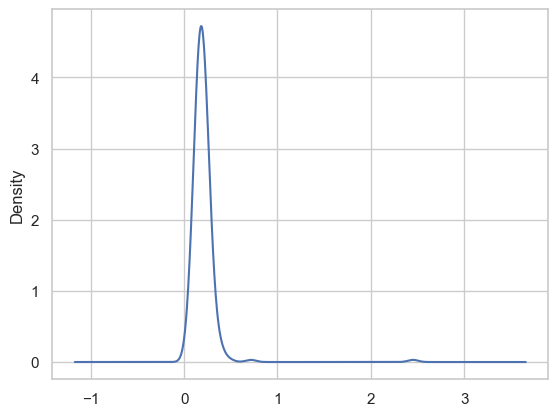

In [60]:
tips['tips_pct'].plot.density()

We can use 'distplot' to plot histograms and density estimators simultaneously.

We are considering a bimodal distribution below

C:\Users\Visakan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

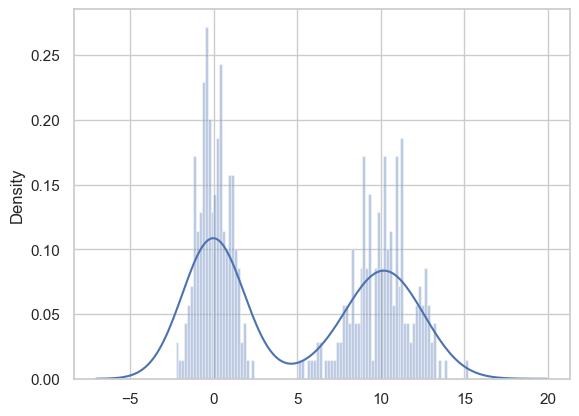

In [63]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100)

### Scatter/Point plots

In [65]:
macro = pd.read_csv('examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [70]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [67]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Now we can use 'regplot' which makes a scatter plot and fits a linear regression line

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

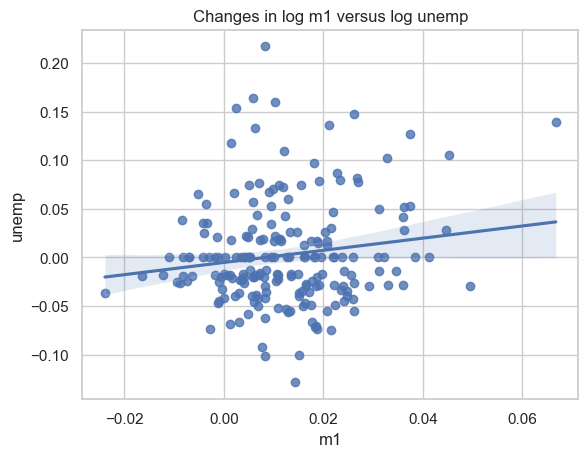

In [72]:
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title("Changes in log %s versus log %s" % ('m1', 'unemp'))

In some cases we might need to look at all plots among a group of variables. For this case we can use 'pairplot' method

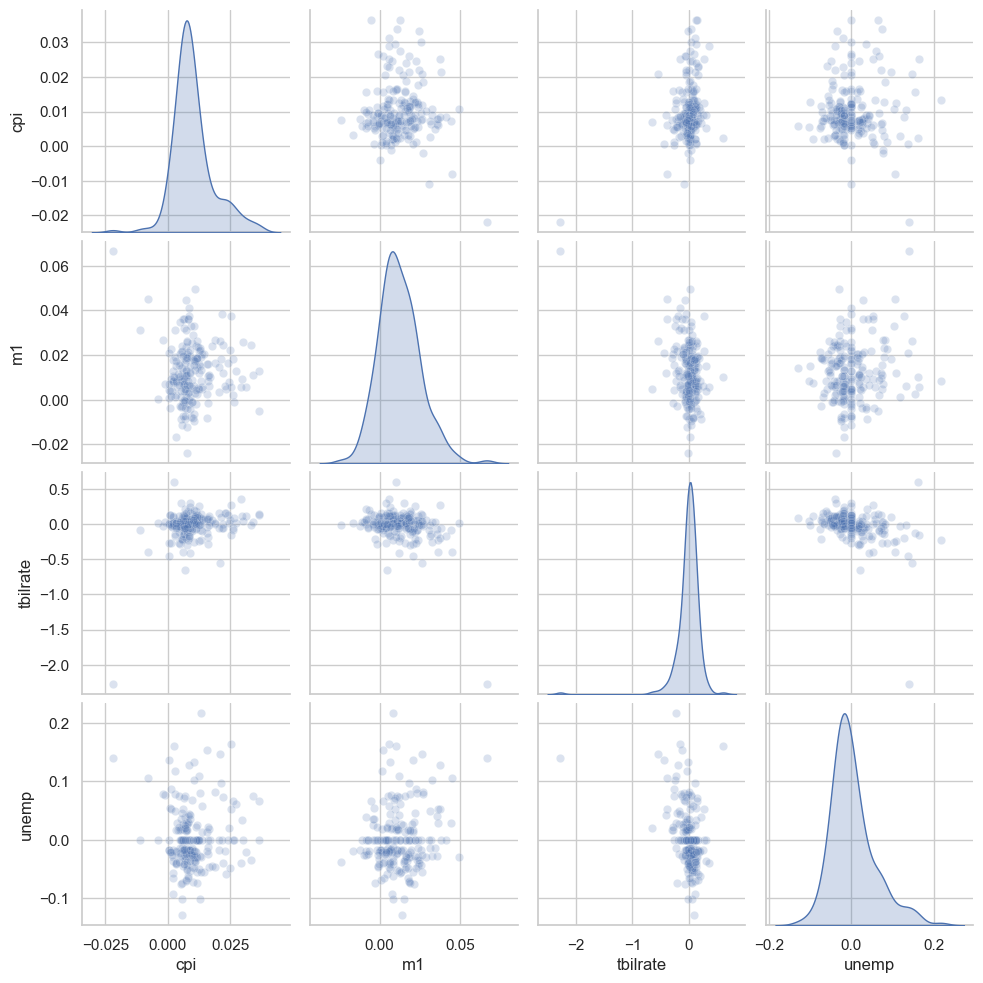

In [73]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet grids and Categorical data

We use facet grids to visualize data with many categorical variables/groupings. The functions used for this is 'catplot'

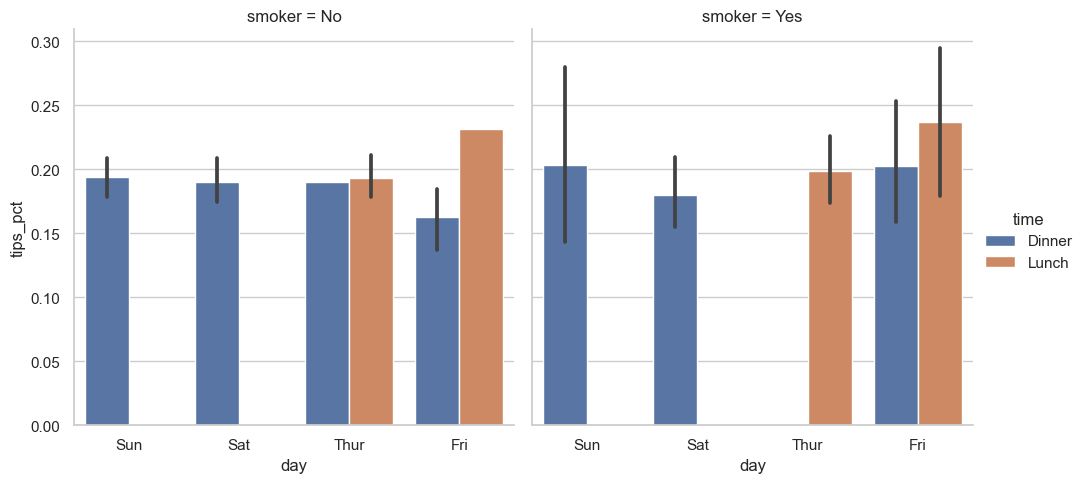

In [75]:
sns.catplot(x='day', y='tips_pct', hue='time', col='smoker', kind='bar',
              data=tips[tips.tips_pct < 1])

Instead of grouping by time we can expand the plot by adding one row per time value

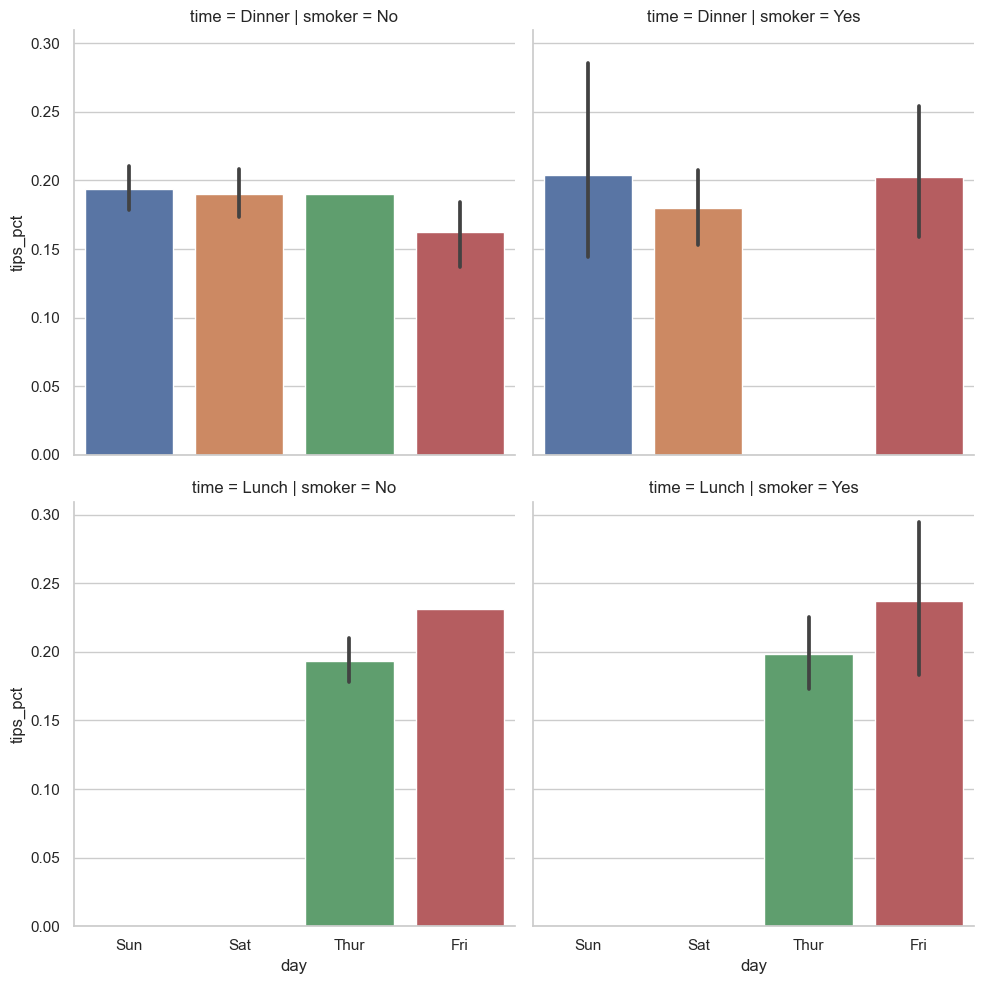

In [76]:
sns.catplot(x='day', y='tips_pct', row='time', col='smoker', kind='bar',
              data=tips[tips.tips_pct < 1])

It also supports other kinds of plots like the box plot

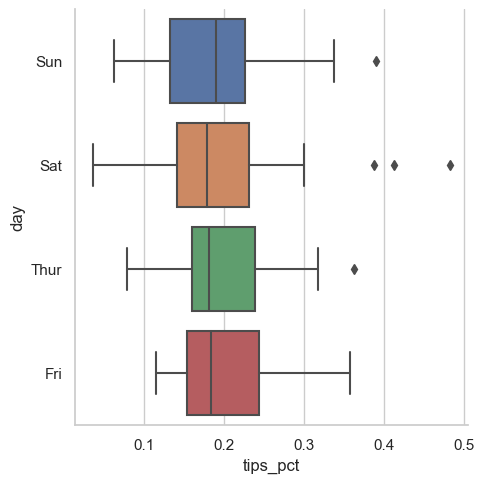

In [80]:
sns.catplot(y='day', x='tips_pct', kind='box',
              data=tips[tips.tips_pct < 0.5])